

# Customer Segmentation Based on Credit Card Usage Behavior

Customer segmentation based on credit card usage behavior enables businesses to better understand their clientele, allowing for personalized services, targeted marketing strategies, and effective risk management. By analyzing customer behaviors—such as spending patterns and payment habits—companies can identify distinct groups of users and tailor offerings to their specific needs.

This project uses clustering techniques to segment customers based on their credit card usage patterns.
test

---

## 📊 About the Dataset

This dataset contains anonymized behavioral data of credit card customers, with 18 features that reflect their usage patterns. These features can be used to perform customer segmentation to inform marketing and risk management strategies.

### **Data Dictionary**

| Feature                          | Description                                          |
| -------------------------------- | ---------------------------------------------------- |
| `CUSTID`                         | Unique identification of the credit cardholder       |
| `BALANCE`                        | Balance amount left in the account for purchases     |
| `BALANCEFREQUENCY`               | Frequency of balance updates (0 to 1 scale)          |
| `PURCHASES`                      | Total amount of purchases made                       |
| `ONEOFFPURCHASES`                | Maximum purchase amount made in a single transaction |
| `INSTALLMENTSPURCHASES`          | Total purchases made in installments                 |
| `CASHADVANCE`                    | Total amount of cash in advance taken                |
| `PURCHASESFREQUENCY`             | Frequency of purchases (0 to 1 scale)                |
| `ONEOFFPURCHASESFREQUENCY`       | Frequency of one-off purchases (0 to 1 scale)        |
| `PURCHASESINSTALLMENTSFREQUENCY` | Frequency of installment purchases (0 to 1 scale)    |
| `CASHADVANCEFREQUENCY`           | Frequency of cash advances (0 to 1 scale)            |
| `CASHADVANCETRX`                 | Number of cash advance transactions                  |
| `PURCHASESTRX`                   | Number of purchase transactions                      |
| `CREDITLIMIT`                    | Credit limit assigned to the customer                |
| `PAYMENTS`                       | Total amount of payments made                        |
| `MINIMUM_PAYMENTS`               | Minimum amount of payments made                      |
| `PRCFULLPAYMENT`                 | Percentage of full payment made                      |
| `TENURE`                         | Duration of credit card service (in months)          |

---

## 🔧 Project Workflow

### 1. **Data Preprocessing**

* Handling missing values
* Feature selection and scaling
* Removing outliers if necessary

### 2. **Clustering using K-Means**

* Determining the optimal number of clusters (using Elbow Method and/or Silhouette Score)
* Applying KMeans clustering to group customers

### 3. **Interpretation of Clusters**

* Profiling each cluster based on average feature values
* Understanding customer segments and their characteristics

### 4. **Visualization using PCA**

* Reducing dimensionality for visualization
* Plotting the clusters in 2D space for interpretation




### Library Imports and Setup

In [16]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings(action="ignore")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



## Data Loading and Preprocessing

Data Loading

In [23]:
df= pd.read_csv("CC GENERAL.csv")
print(df.shape)
df.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Data Preprocessing

Descriptive Statistics of Data

In [24]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


From the statistics values we can see that data is skewed and there might be outliers

Customer ID is definitely have no meaning at all in terms of building a clustering model (or any prediction model).
So the first thing we want to do it to drop this customer Id column.

In [25]:

df.drop(['CUST_ID'], axis=1, inplace=True)

In [26]:
# As a next step, we would also like to see how many null values are there, and if there is one, we will need to handle them.
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [27]:
# The easiest way to handle the columns with null values is either to drop those rows, or fill with mean value.
# Here, we would just fill it with mean value
df = df.fillna(df.mean())

# Verify all the columns are filled
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Checking the skewness of data

In [28]:
df.skew()      # Asymmetry of distribution
df.kurtosis()  # Peakedness / heavy tails

BALANCE                               7.674751
BALANCE_FREQUENCY                     3.092370
PURCHASES                           111.388771
ONEOFF_PURCHASES                    164.187572
INSTALLMENTS_PURCHASES               96.575178
CASH_ADVANCE                         52.899434
PURCHASES_FREQUENCY                  -1.638631
ONEOFF_PURCHASES_FREQUENCY            1.161846
PURCHASES_INSTALLMENTS_FREQUENCY     -1.398632
CASH_ADVANCE_FREQUENCY                3.334734
CASH_ADVANCE_TRX                     61.646862
PURCHASES_TRX                        34.793100
CREDIT_LIMIT                          2.837308
PAYMENTS                             54.770736
MINIMUM_PAYMENTS                    294.384393
PRC_FULL_PAYMENT                      2.432395
TENURE                                7.694823
dtype: float64

Visualizing boxplot

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_features_boxplot(df, columns, title=" Feature Distributions"):
    """
    Plots side-by-side boxplots of  features.
    
    Args:
        data (pd.DataFrame): Your DataFrame .
        columns (list): List of column names to plot.
        title (str): Title for the plot.
    """
    # Melt the dataframe to long format
    melted = df[columns].melt(var_name='Feature', value_name='Value')

    # Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Feature', y='Value', data=melted, palette='Set2')
    
    # Aesthetics
    plt.title(title, fontsize=14)
    plt.xlabel("Feature", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


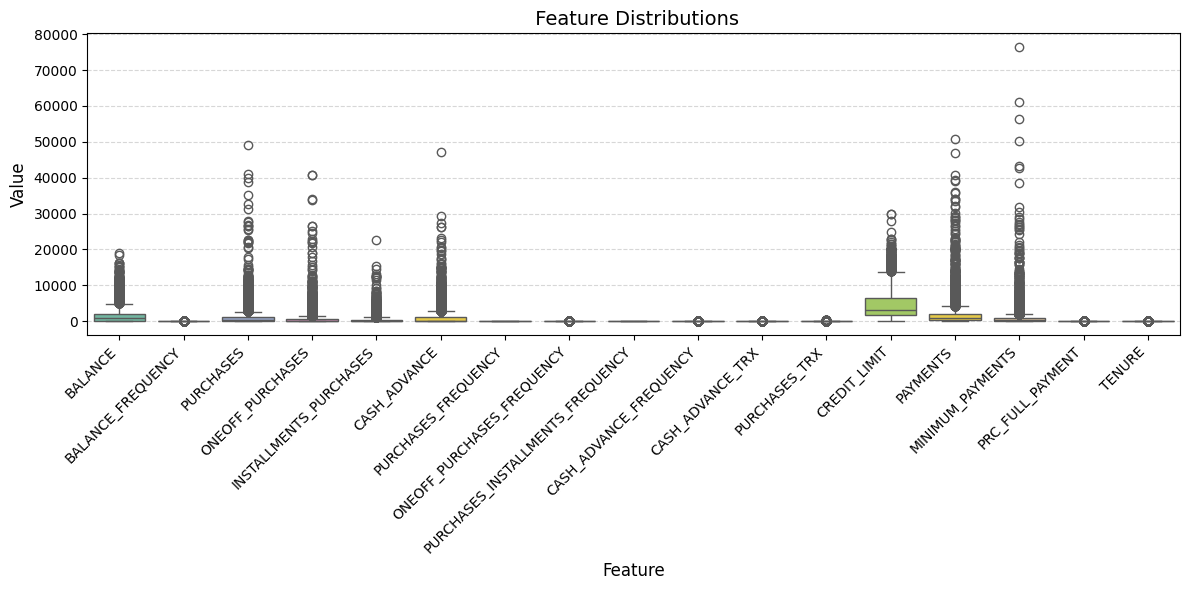

In [37]:
range_features = [col for col in df.columns ]
#print(features)  # Optional: to confirm what will be plotted
plot_features_boxplot(df, range_features)



The data is standardized using StandardScaler, which transforms the features to have zero mean and unit variance.

This is critical for KMeans, as it relies on Euclidean distance — and features on different scales would distort results.

In unsupervised learning, especially clustering, multicollinearity (high correlation between features) can distort results. Since algorithms like K-Means rely on distance calculations, redundant features can overweight certain patterns and lead to biased or unclear clusters. Removing multicollinear features helps improve clustering accuracy, simplifies interpretation, and makes PCA (if used) more effective.



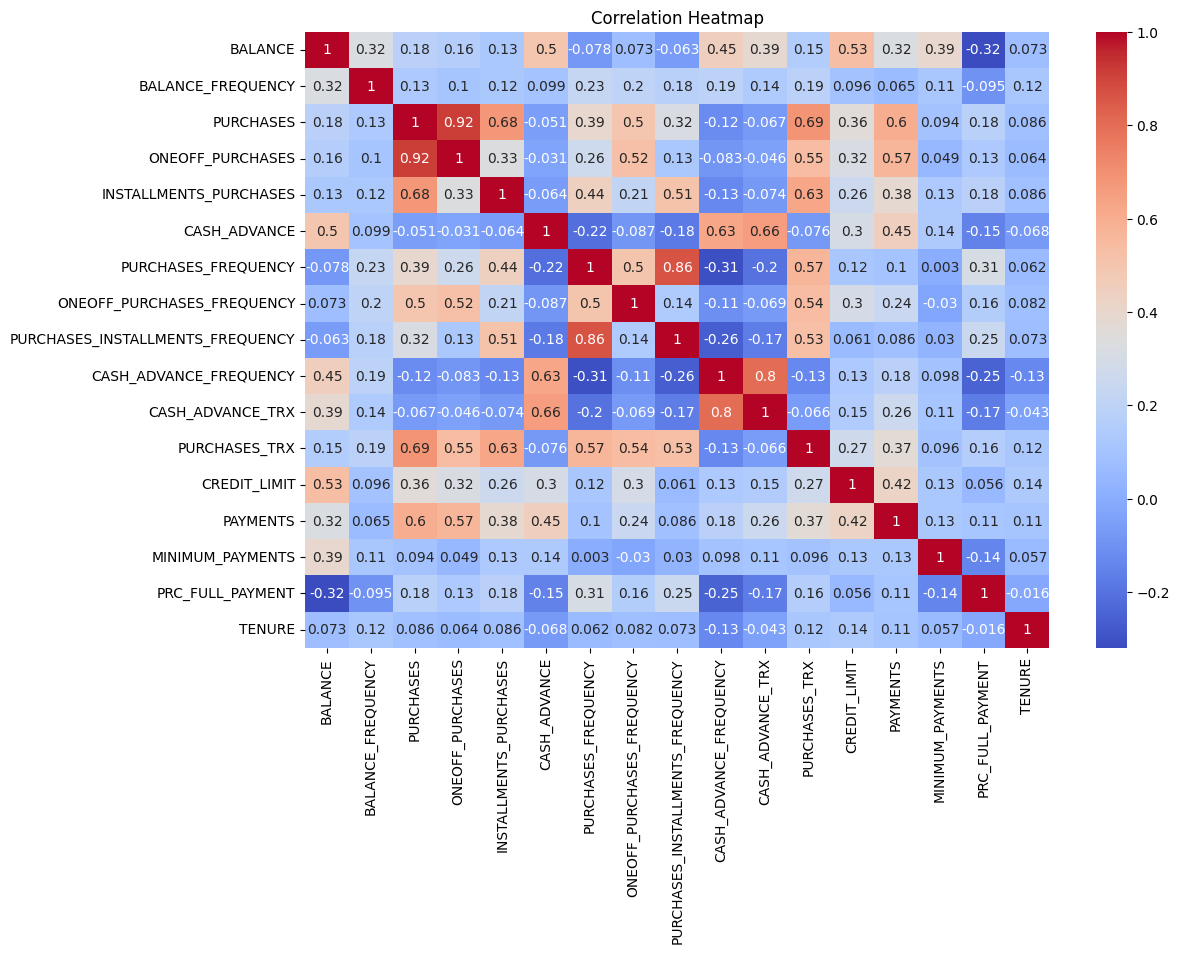

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap")
plt.show()


Highly Positively Correlated Features

PURCHASES_RANGE and ONEOFF_PURCHASES_RANGE (0.81)

PURCHASES_RANGE and PURCHASES_TRX_RANGE (0.73)

PURCHASES_TRX_RANGE and PURCHASES_FREQUENCY_RANGE (0.85)

CASH_ADVANCE_RANGE and CASH_ADVANCE_TRX_RANGE (0.8)

CASH_ADVANCE_TRX_RANGE and CASH_ADVANCE_FREQUENCY_RANGE (0.8)

Negatively Correlated Features

PRC_FULL_PAYMENT_RANGE and BALANCE_RANGE (–0.43)

PRC_FULL_PAYMENT_RANGE and PURCHASES_TRX_RANGE (–0.29)

Weakly Correlated / Independent Features

TENURE is weakly correlated with almost everything

BALANCE_FREQUENCY_RANGE is largely uncorrelated too

# Scaling and feature selection

Scaling data

In [40]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

Using PCA for dimensionality reduction

In [41]:
pca = PCA(n_components=0.95)  # Keep 95% variance
data_pca = pca.fit_transform(scaled_data)
data_pca

array([[-1.68222026e+00, -1.07645061e+00, -4.88506522e-01, ...,
         7.77742533e-02, -2.35181245e-01,  5.38864196e-02],
       [-1.13829490e+00,  2.50647666e+00, -6.01212326e-01, ...,
         7.77670992e-01, -8.71437147e-01,  6.01855233e-01],
       [ 9.69684015e-01, -3.83520301e-01, -1.02371379e-01, ...,
         1.93865634e-03, -7.61724953e-01, -6.84204379e-01],
       ...,
       [-9.26203638e-01, -1.81078560e+00,  4.74723055e-01, ...,
         8.30004807e-01,  1.20555846e-01, -6.99539739e-02],
       [-2.33655167e+00, -6.57966015e-01, -9.74725121e-01, ...,
        -2.68660267e-01, -3.06616778e-01,  1.14784511e-01],
       [-5.56422165e-01, -4.00467124e-01, -1.01519557e+00, ...,
        -3.45743919e-01, -5.04954962e-01, -1.14361239e-01]])

 # Clustering

Elbow Method before clustering is highly recommended and is a standard step in unsupervised learning to choose the optimal number of clusters (k) for algorithms like K-Means.

What Is the Elbow Method?
The Elbow Method helps determine the best k (number of clusters) by plotting:

X-axis: Number of clusters (k)

Y-axis: Within-Cluster Sum of Squares (WCSS)
(also called inertia or distortion — a measure of how tightly grouped the clusters are)

You look for the “elbow” point — where the rate of improvement sharply decreases — as the ideal number of clusters.

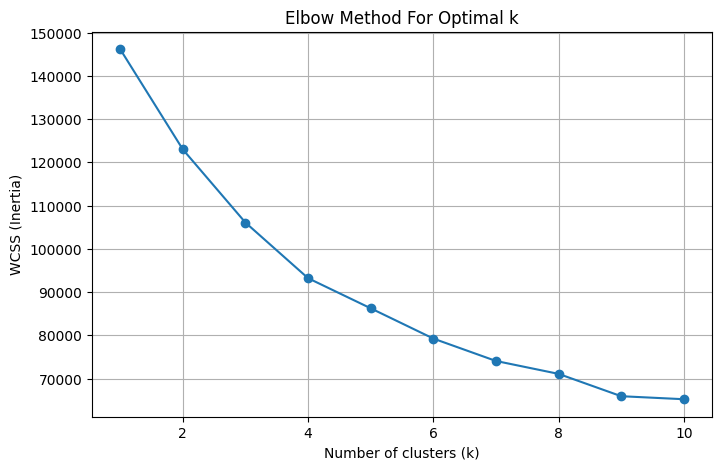

In [42]:

# Elbow Method
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the results
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()


### Elbow Method Interpretation

The **Elbow Method** is used to determine the optimal number of clusters (`k`) for clustering algorithms like KMeans.

In the plot above, we observe that:

- **WCSS (Within-Cluster Sum of Squares)** drops steeply as `k` increases from 1 to 4.
- After **`k = 4`**, the rate of decrease in WCSS slows down significantly.
- This indicates that adding more clusters beyond 4 does not significantly improve the compactness of the clusters.

 **Conclusion**:  
The **"elbow point" appears at `k = 4`**, which is the optimal number of clusters. We will proceed with KMeans clustering using `n_clusters = 4`. 


In [ ]:
optimal_k = 4  # (For example, based on elbow)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(data_pca)

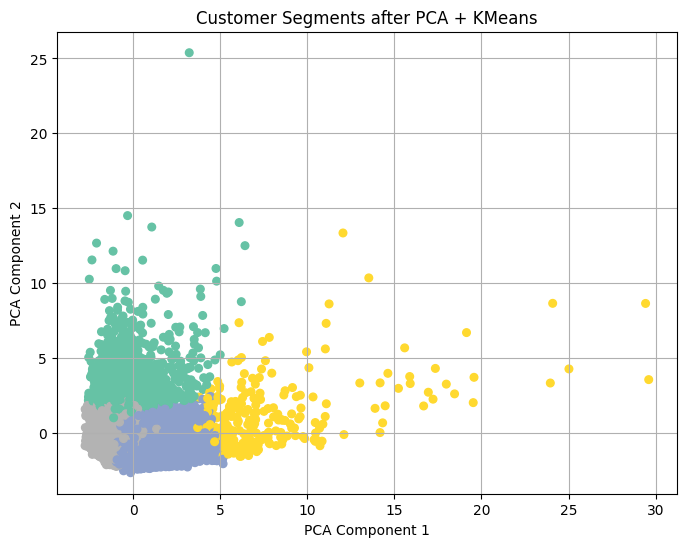

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='Set2', s=30)
plt.title('Customer Segments after PCA + KMeans')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


In [58]:
data['Cluster'] = kmeans.labels_  # Assigns cluster labels from KMeans to the original data

cluster_summary = data.groupby('Cluster').mean()  # Calculates mean of all features per cluster

display(cluster_summary)  # Displays the summary (works in notebooks)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,4591.560169,0.968516,527.716714,338.849983,188.951104,4518.932440,0.288784,0.140492,0.186527,0.484671,14.327801,7.892946,7552.742361,3520.183551,2007.165053,0.036112,11.389212
1,974.577421,0.941373,1376.263885,689.087277,687.358888,221.342201,0.893509,0.317801,0.719996,0.043140,0.807647,24.154407,4412.556991,1460.154149,669.957058,0.270337,11.621716
2,4046.163699,0.985380,9409.135448,6299.801493,3111.572761,677.635390,0.945155,0.755020,0.787557,0.071517,2.171642,101.197761,10415.671642,8823.181416,2452.200235,0.297847,11.958955
3,998.752305,0.788765,273.032893,208.551081,64.817647,586.437472,0.179262,0.086786,0.088664,0.113194,2.089114,3.028388,3262.268028,963.395597,583.449055,0.080532,11.437917


In [59]:
df['Cluster'] = kmeans.labels_  # df is your original DataFrame (after preprocessing)

# Now you can analyze the original features per cluster
cluster_summary_original = df.groupby('Cluster').mean()
display(cluster_summary_original)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,4591.560169,0.968516,527.716714,338.849983,188.951104,4518.932440,0.288784,0.140492,0.186527,0.484671,14.327801,7.892946,7552.742361,3520.183551,2007.165053,0.036112,11.389212
1,974.577421,0.941373,1376.263885,689.087277,687.358888,221.342201,0.893509,0.317801,0.719996,0.043140,0.807647,24.154407,4412.556991,1460.154149,669.957058,0.270337,11.621716
2,4046.163699,0.985380,9409.135448,6299.801493,3111.572761,677.635390,0.945155,0.755020,0.787557,0.071517,2.171642,101.197761,10415.671642,8823.181416,2452.200235,0.297847,11.958955
3,998.752305,0.788765,273.032893,208.551081,64.817647,586.437472,0.179262,0.086786,0.088664,0.113194,2.089114,3.028388,3262.268028,963.395597,583.449055,0.080532,11.437917


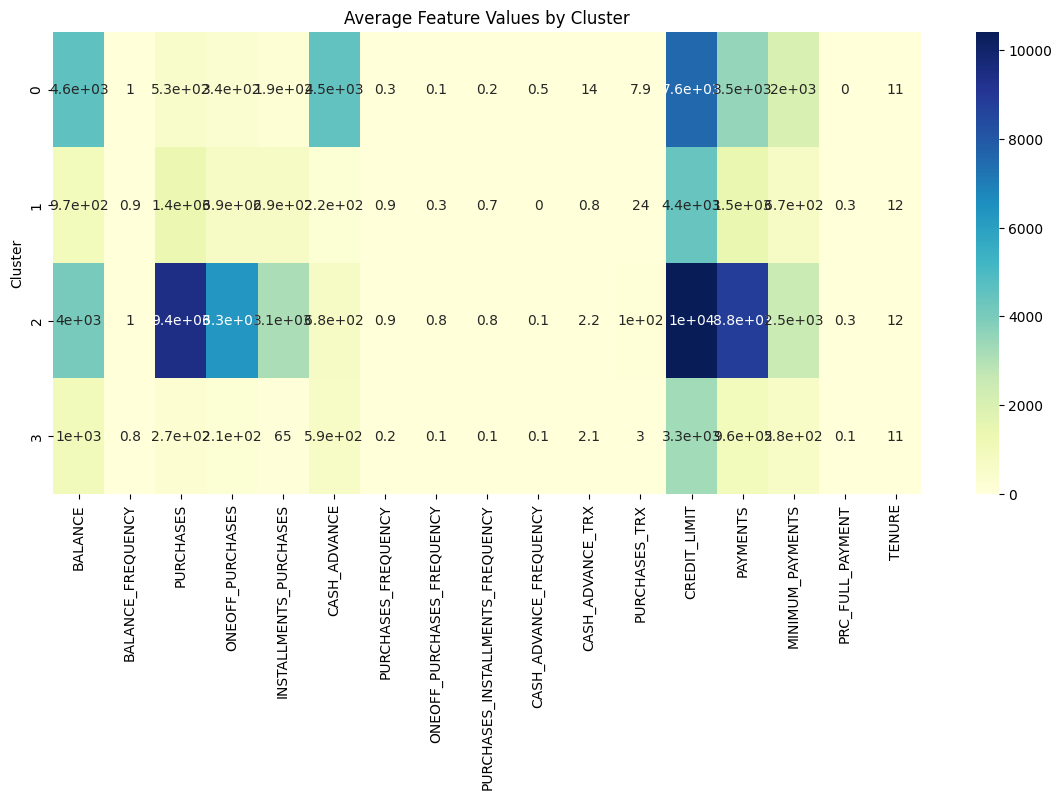

In [60]:


plt.figure(figsize=(14, 6))
sns.heatmap(cluster_summary.round(1), annot=True, cmap="YlGnBu")
plt.title("Average Feature Values by Cluster")
plt.show()


Evaluate Clustering Quality

Silhouette Score (Best for KMeans)
This measures how similar a data point is to its own cluster vs other clusters.

In [61]:

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Silhouette Score: Measures how well each point fits within its cluster
# - Range: [-1, +1]
# - Closer to +1 means better defined and well-separated clusters
silhouette = silhouette_score(data_pca, labels)

# Calinski-Harabasz Index: Ratio of between-cluster variance to within-cluster variance
# - Higher is better
# - Indicates well-separated clusters with tight cohesion
calinski = calinski_harabasz_score(data_pca, labels)

# Davies-Bouldin Index: Average similarity between clusters (lower is better)
# - Lower means clusters are compact and far apart
davies = davies_bouldin_score(data_pca, labels)

# Print results
print(f"Silhouette Coefficient      : {silhouette:.3f} (closer to 1 is better)")
print(f"Calinski-Harabasz Index     : {calinski:.3f} (higher is better)")
print(f"Davies-Bouldin Index        : {davies:.3f} (lower is better)")



Silhouette Coefficient      : 0.212 (closer to 1 is better)
Calinski-Harabasz Index     : 1694.912 (higher is better)
Davies-Bouldin Index        : 1.499 (lower is better)




Cluster 0:
✅ High BALANCE_FREQUENCY_RANGE, BALANCE_RANGE, MINIMUM_PAYMENTS_RANGE, PURCHASES_RANGE, and CREDIT_LIMIT_RANGE

📉 Low CASH_ADVANCE_RANGE, PRC_FULL_PAYMENT_RANGE

🧾 Interpretation: Heavy Users with High Balances
These customers likely carry higher balances, make frequent purchases, and pay minimum payments — possibly revolvers.

Cluster 1:
✅ Moderate BALANCE_RANGE and CASH_ADVANCE_TRX_RANGE

❌ Low on PURCHASES_* and payment features

🧾 Interpretation: Cash Advance Users
Likely depend more on cash advances, and make fewer purchases — riskier segment.

Cluster 2:
✅ Highest PRC_FULL_PAYMENT_RANGE, PURCHASES_INSTALLMENTS_FREQUENCY_RANGE, and CREDIT_LIMIT_RANGE

🧾 Interpretation: Disciplined Installment Spenders
These are responsible users who use credit for purchases and pay full balance regularly.

Cluster 3:
❌ Lowest across almost all features

🧾 Interpretation: Low Activity or New Customers
Possibly inactive or low-usage cardholders, or newly onboarded users.

